In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


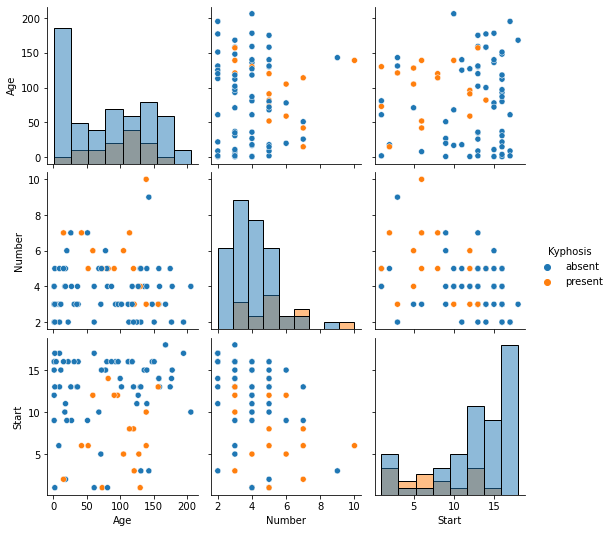

In [5]:
sns.pairplot(data=df, hue='Kyphosis', diag_kind='hist')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.3)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree

DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
from sklearn import tree

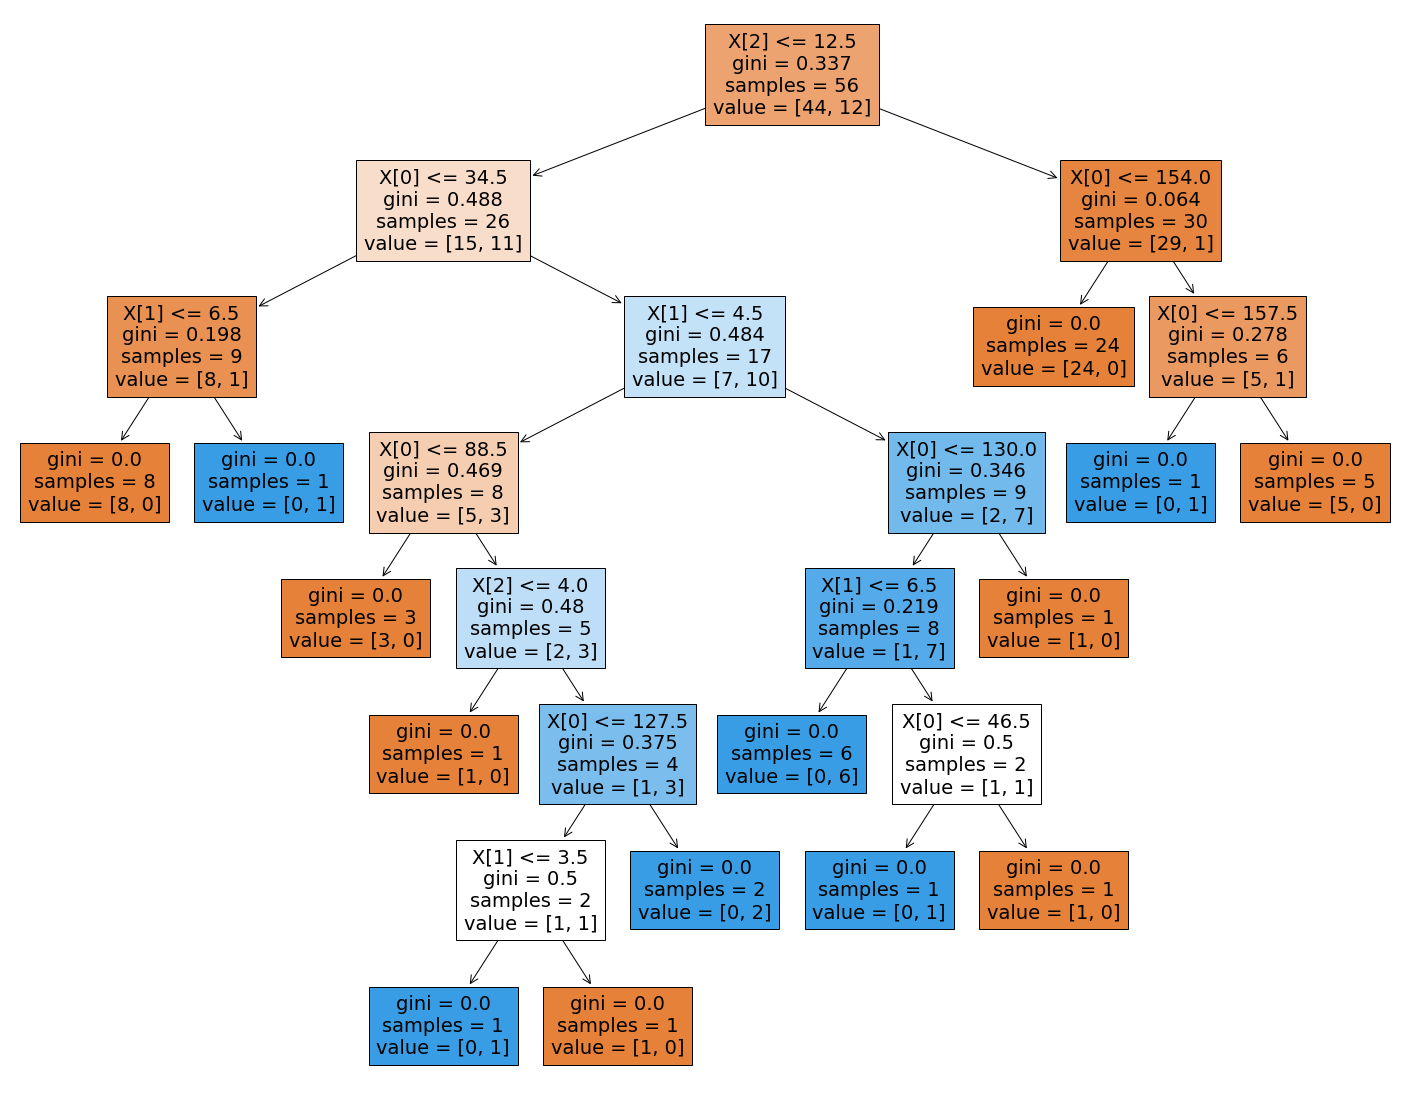

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, filled=True)


In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(confusion_matrix(y_test, predictions))
print('--------------------------')
print(classification_report(y_test, predictions))

[[17  3]
 [ 5  0]]
--------------------------
              precision    recall  f1-score   support

      absent       0.77      0.85      0.81        20
     present       0.00      0.00      0.00         5

    accuracy                           0.68        25
   macro avg       0.39      0.42      0.40        25
weighted avg       0.62      0.68      0.65        25



In [17]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators=200)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [24]:
rfc_predictions = rfc.predict(X_test)

In [25]:
print(confusion_matrix(y_test, rfc_predictions))
print('--------------------------')
print(classification_report(y_test, rfc_predictions))

[[18  2]
 [ 3  2]]
--------------------------
              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [28]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64